In [1]:
#| output: false
import src
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

td = pd.read_pickle('../results/dekodec/Prez_20220721_dekodec_split.pkl')
td.columns

Index(['M1_spikes', 'M1_unit_guide', 'MC_spikes', 'MC_unit_guide',
       'PMd_spikes', 'PMd_unit_guide', 'bin_size', 'cst_cursor_command',
       'ct_location', 'cursor_pos', 'date_time', 'hand_pos', 'idx_cstEndTime',
       'idx_cstStartTime', 'idx_ctHoldTime', 'idx_endTime', 'idx_failTime',
       'idx_goCueTime', 'idx_pretaskHoldTime', 'idx_rewardTime',
       'idx_rtHoldTimes', 'idx_rtgoCueTimes', 'idx_startTime', 'lambda',
       'monkey', 'raw_left_eye_pos', 'raw_left_pupil', 'rel_cursor_pos',
       'rel_hand_pos', 'result', 'rt_locations', 'task', 'trial_id',
       'session_date', 'M1_rates', 'MC_rates', 'PMd_rates', 'lfads_rates',
       'lfads_inputs', 'hand_vel', 'hand_acc', 'cursor_vel', 'hand_speed',
       'Time from go cue (s)', 'Time from task cue (s)', 'trialtime',
       'lfads_rates_joint_pca', 'lfads_rates_joint_pca_cst_unique',
       'lfads_rates_joint_pca_rtt_unique', 'lfads_rates_joint_pca_shared',
       'lfads_rates_joint_pca_split'],
      dtype='object')

Here, we'll start by plotting the total variance for each task in each subspace, just to check that the split worked well.

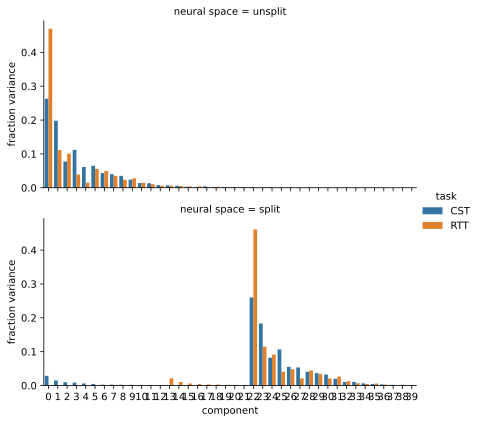

In [2]:
src.plot.plot_split_subspace_variance(td,signal='lfads_rates_joint_pca')

The first thing to note is that the unique subspaces are quite small in variance accounted for, compared to the shared subspace. This is maybe not so surprising, since the two tasks both comprise similar reaching movements. The second thing to note is that for the unique spaces the method did find, the variance seems to be very well segregated--there's seemingly no RTT task variance in the first subspace, and no CST variance in the second.

Now, let's take a look at how the variance of individual CST and RTT trials look in the two unique subspaces. Based on the previous figure, we would expect that CST trials should not have any RTT subspace activity, and RTT trials should not have any CST subspace activity.

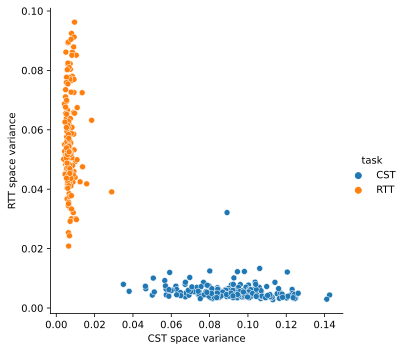

In [3]:
src.plot.plot_single_trial_split_var(td,signal='lfads_rates_joint_pca')

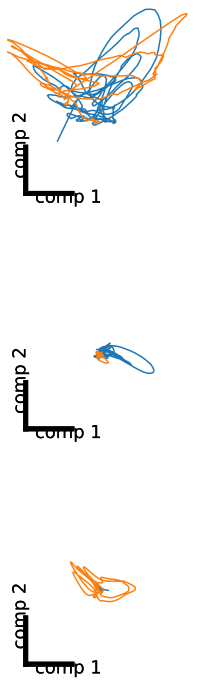

In [10]:
signal = 'lfads_rates_joint_pca'
def plot_trial_split_space_2D(trial_to_plot,ax_list,color='k'):
    sig_list = [f'{signal}_shared',f'{signal}_cst_unique',f'{signal}_rtt_unique']
    # sig_list = [f'{signal}_shared',f'{signal}_CST',f'{signal}_RTT']

    for ax,sig in zip(ax_list,sig_list):
        ax.plot([-0.4,-0.15],[-0.4,-0.4],color='k',lw=5)
        ax.text(-0.35,-0.45,'comp 1',fontsize=18)
        ax.plot([-0.4,-0.4],[-0.4,-0.15],color='k',lw=5)
        ax.text(-0.475,-0.3,'comp 2',fontsize=18,rotation=90)
        ax.set_xlim([-0.5,0.6])
        ax.set_ylim([-0.5,0.6])
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.plot(trial_to_plot[sig][:,0],trial_to_plot[sig][:,1],color=color)
        ax.set_aspect('equal')
        sns.despine(ax=ax,trim=True,left=True,bottom=True)


trials_to_plot = td.set_index('trial_id').loc[[71,52]]
# trials_to_plot = td.groupby('task').sample(n=1).set_index('trial_id')
fig,axs = plt.subplots(3,1,figsize=(4,10))
fig.tight_layout()
for colnum,(trial_id,trial) in enumerate(trials_to_plot.iterrows()):
    plot_trial_split_space_2D(trial,axs,color='C0' if trial['task']=='CST' else 'C1')

fig_name = src.util.format_outfile_name(td,postfix='cst_rtt_split_space_2D')
# fig.savefig(os.path.join('../results/2023_ncm_poster/',fig_name+'.pdf'))

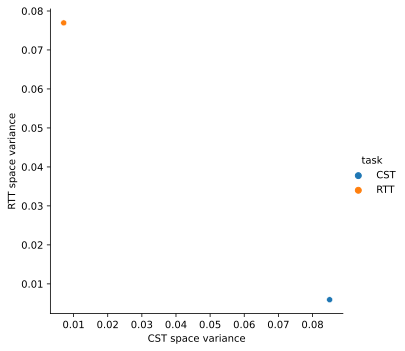

In [7]:

g = src.plot.plot_single_trial_split_var(trials_to_plot,signal='lfads_rates_joint_pca')